In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

Using TensorFlow backend.


58892288/58889256 [==============================] - 1s 0us/step


In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 200)
validation_features, validation_labels = extract_features(validation_dir, 100)
test_features, test_labels = extract_features(test_dir, 100)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features,(200, 4*4*512))
validation_features = np.reshape(validation_features,(100, 4*4*512))
test_features = np.reshape(test_features,(100, 4*4*512))

In [6]:
from keras import models
from keras import layers
from keras import optimizers


model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit( x =train_features,y = train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 200 samples, validate on 100 samples
Epoch 1/30
200/200 [==============================] - 0s 2ms/step - loss: 0.7525 - acc: 0.5400 - val_loss: 0.6413 - val_acc: 0.6300
Epoch 2/30
200/200 [==============================] - 0s 1ms/step - loss: 0.7103 - acc: 0.5700 - val_loss: 0.5919 - val_acc: 0.7300
Epoch 3/30
200/200 [==============================] - 0s 1ms/step - loss: 0.5073 - acc: 0.7300 - val_loss: 0.5489 - val_acc: 0.7900
Epoch 4/30
200/200 [==============================] - 0s 1ms/step - loss: 0.6145 - acc: 0.6950 - val_loss: 0.5343 - val_acc: 0.7700
Epoch 5/30
200/200 [==============================] - 0s 1ms/step - loss: 0.5715 - acc: 0.7000 - val_loss: 0.5335 - val_acc: 0.7400
Epoch 6/30
200/200 [==============================] - 0s 1ms/step - loss: 0.4696 - acc: 0.7950 - val_loss: 0.4906 - val_acc: 0.8200
Epoch 7/30
200/200 [==============================] - 0s 1ms/step - loss: 0.4414 - acc: 0.8100 - val_loss: 0.4863 - val_acc: 0.7900
Epoch 8/30
200/200 [==========

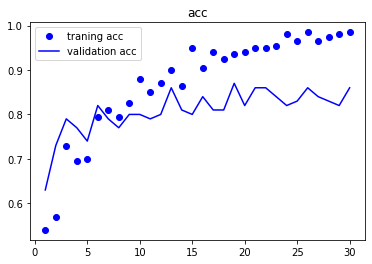

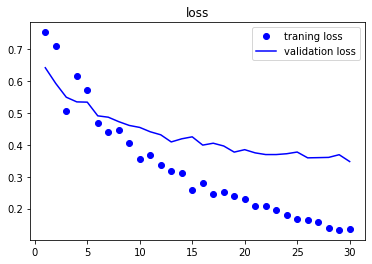

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print()
epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='traning acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='traning loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('loss')
plt.legend()

plt.show()